# Software Evolution - Practical Session
## Laws of software evolution based on code counting
## Academic year 2023-2024

### Write your answers under the questions that are present in this notebook  

#### Note: Print the final output of each cell in this notebook

#### Read the provided description document before proceeding with the following notebook

## 1.  Data preprocessing

To install packages, use :

pip install tqdm  pandas numpy matplotlib scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from permetrics.regression import RegressionMetric
from scipy.optimize import curve_fit

### Import dataset

First, import the dataset that contains the total lines of code, total blank lines, total comment lines, total number of files, and release date for each tag.

In [4]:
# WRITE YOUR CODE HERE
df = pd.read_csv("data/LawIncreasingGrowthDataset.csv")
df

,tag,code,blank,comment,nFiles,release_date
0,1.4,48551,8727,11154,419,2009-01-06
1,1.5.0,63240,11018,18457,512,2009-02-18
2,jaunty,70751,11840,19671,578,2009-06-23
3,1.5.1,67939,11618,18131,600,2009-08-05
4,1.5.2,68564,11555,11906,611,2009-08-17
...,...,...,...,...,...,...
56,4.3.1,456159,72232,219480,3405,2016-12-14
57,4.3.1.1,456159,72232,219480,3405,2017-02-02
58,4.4.0,472926,75325,216544,3597,2017-03-07
59,4.4.1,473836,75392,216678,3598,2017-05-08


### Dataset A : Major.Minor.Patch tag format

Filter out non-official releases such as alpha, beta, release candidates, milestones, branches, and unnumbered tags. Additionally, version numbers typically follow a Major.Minor.Patch format, but exceptions exist (e.g., 1.4, 3.3.0.1, 4.3.0.1, or 4.3.1.1). Versions with more than three components are disregarded, and two-component versions are treated as implicit three-component versions (e.g., 1.4 is interpreted as 1.4.0).  

Write a regular expression statement to identify tags following semantic versioning (major.minor.patch) guidelines. You can use the pattern: '^v?[0-9]+\.[0-9]+(\.[0-9]+)?$'  

Once you've applied this regex, print out the selected major.minor.patch dataset.

In [5]:
# WRITE YOUR CODE HERE
dfa = df[df.tag.str.contains('^v?[0-9]+.[0-9]+(.[0-9]+)?$' )]
dfa

/tmp/ipykernel_25330/2863027263.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dfa = df[df.tag.str.contains('^v?[0-9]+.[0-9]+(.[0-9]+)?$' )]


,tag,code,blank,comment,nFiles,release_date
0,1.4,48551,8727,11154,419,2009-01-06
1,1.5.0,63240,11018,18457,512,2009-02-18
3,1.5.1,67939,11618,18131,600,2009-08-05
4,1.5.2,68564,11555,11906,611,2009-08-17
6,1.6.1,86799,14582,41327,744,2009-11-05
9,2.0.0,115586,18488,42717,1074,2010-06-05
10,2.0.1,115699,18492,42724,1074,2010-07-06
21,3.0.0,188246,29836,60879,1694,2012-02-07
22,3.0.1,189022,29945,61587,1696,2012-03-12
26,3.1.0,191269,29973,62628,1642,2012-06-22


### Dataset B : Major.Minor tag format

Starting from the previous data (**Dataset A**),  for each Major.Minor.Patch tag group, select the earliest version (e.g., for a set of 4.4.0, 4.4.1, and 4.4.2, consider 4.4.0 and rename it to 4.4).

In [6]:
# WRITE YOUR CODE HERE
dfa['Major_Minor'] = dfa['tag'].apply(lambda x: '.'.join(x.split('.')[:2]))

dfa['release_date'] = pd.to_datetime(dfa['release_date'])
earliest_versions = dfa.groupby('Major_Minor')['release_date'].idxmin()

dfb = dfa.loc[earliest_versions].copy()

dfb.loc[earliest_versions, 'tag'] = dfb.loc[earliest_versions, 'Major_Minor']

dfb.drop('Major_Minor', axis=1, inplace=True)
dfb


/tmp/ipykernel_25330/760588739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['Major_Minor'] = dfa['tag'].apply(lambda x: '.'.join(x.split('.')[:2]))
/tmp/ipykernel_25330/760588739.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['release_date'] = pd.to_datetime(dfa['release_date'])


,tag,code,blank,comment,nFiles,release_date
0,1.4,48551,8727,11154,419,2009-01-06
1,1.5,63240,11018,18457,512,2009-02-18
6,1.6,86799,14582,41327,744,2009-11-05
9,2.0,115586,18488,42717,1074,2010-06-05
21,3.0,188246,29836,60879,1694,2012-02-07
26,3.1,191269,29973,62628,1642,2012-06-22
29,3.2,257934,43596,119688,2004,2012-12-17
38,3.3,350914,58798,159566,2682,2013-06-20
42,3.4,291555,48371,149981,2367,2013-10-24
45,4.0,357375,57707,159944,2790,2014-05-30


## 2. Law of Increasing Growth

### Software project's metrics

Visualize four plots representing the evolution of a software project's metrics, including the number of lines of code, blank lines, comment lines, and the number of files, as follows:  

1. Plot the metrics against software version numbers:  
   1.1) For version tags of the format major.minor.patch.  
   1.2) For version tags of the format major.minor.  
   Place these plots at positions (0,0) and (0,1) respectively.  
  
2. Plot the metrics against dates:  
   2.1) For version tags of the format major.minor.patch.  
   2.2) For version tags of the format major.minor.  
   Place these plots right below the corresponding version-based plots, at positions (1,0) and (1,1).  

Hint: Ensure proper datetime formatting for the dates in the datasets instead of storing them as strings.

For example, if you're working with a DataFrame:

fig, axes = plt.subplots(2, 2, figsize=(18, 10))  
dataset_a[['code', 'blank', 'comment', 'nFiles', 'tag']].plot(x='tag', ax=axes[0, 0], legend=True)  
.....  

axes[0, 0].set_xlabel('Major.Minor.Patch versions')  
.....  

plt.tight_layout()  
plt.show()

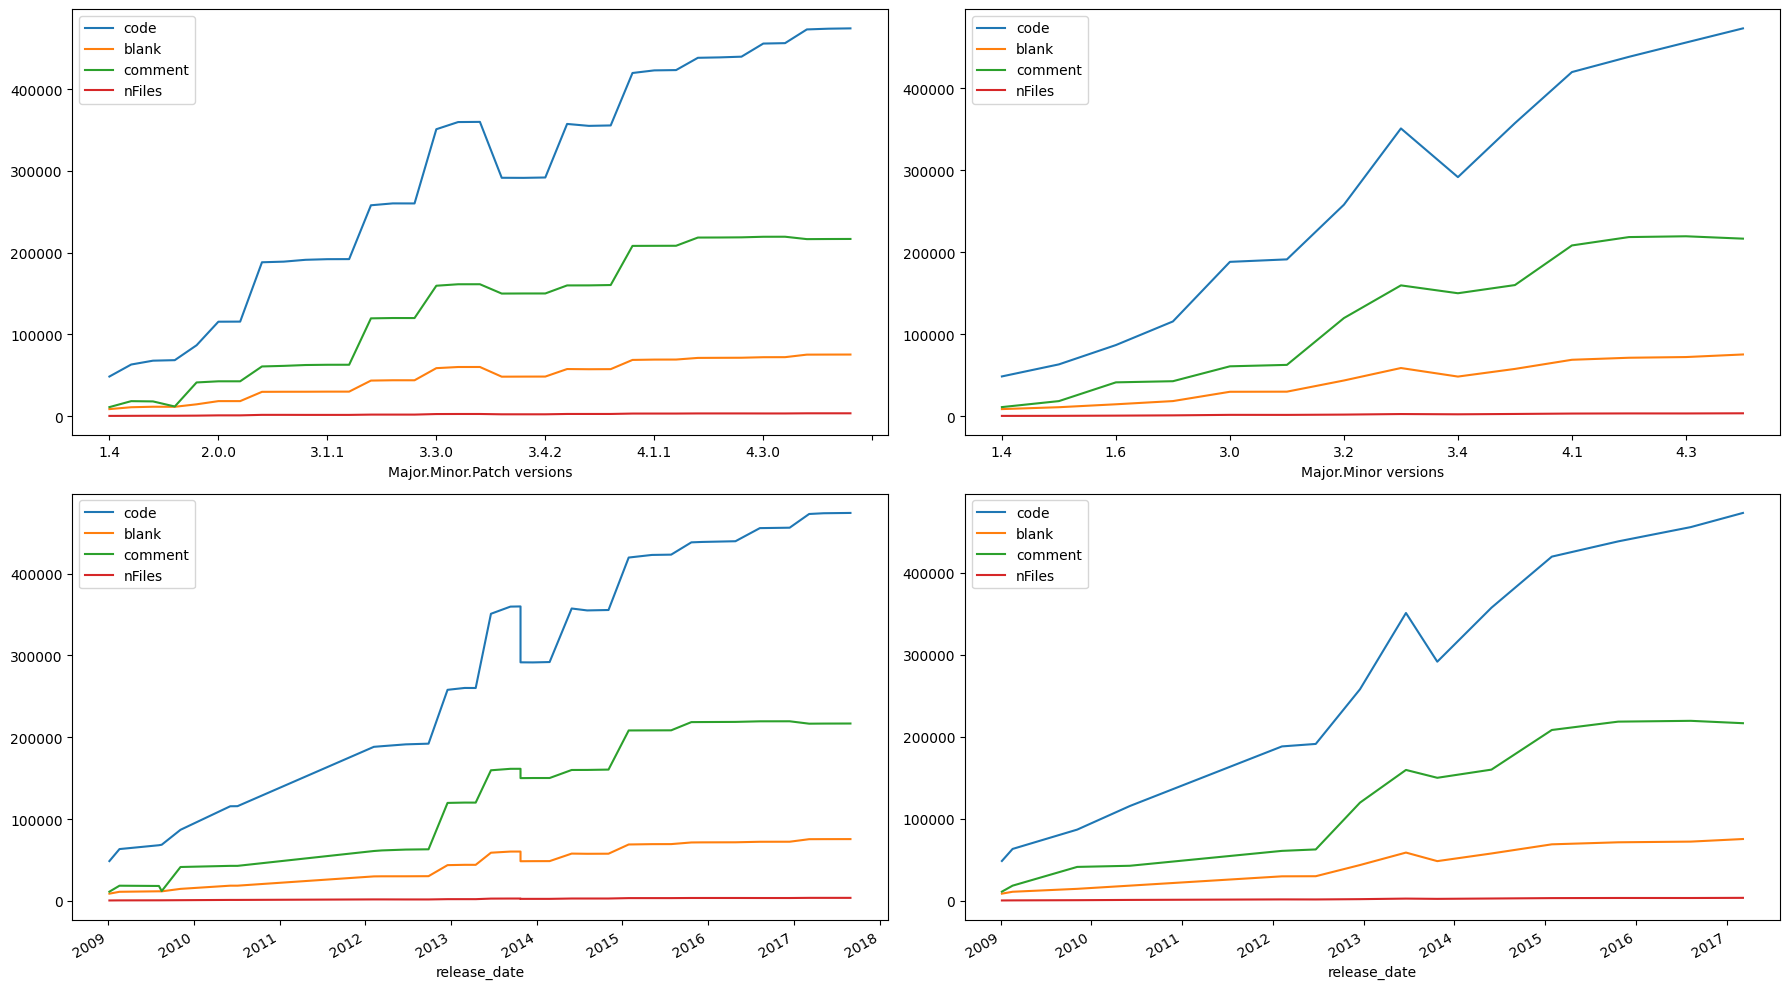

In [7]:
# WRITE YOUR CODE HERE
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
dfa[['code', 'blank', 'comment', 'nFiles', 'tag']].plot(x='tag', ax=axes[0, 0], legend=True)
dfb[['code', 'blank', 'comment', 'nFiles', 'tag']].plot(x='tag', ax=axes[0, 1], legend=True)
dfa[['code', 'blank', 'comment', 'nFiles', 'release_date']].plot(x='release_date', ax=axes[1, 0], legend=True)
dfb[['code', 'blank', 'comment', 'nFiles', 'release_date']].plot(x='release_date', ax=axes[1, 1], legend=True)

axes[0, 0].set_xlabel('Major.Minor.Patch versions')
axes[0, 1].set_xlabel('Major.Minor versions')


plt.tight_layout()
plt.show()

### Questions:

1. Do you find any difference between the plot that is having date in the x-axis and the plot that is having tag in the x-axis? If yes, then what is the difference? If no, then why is it same?

They are pretty similar pic at same place. Except for the part between 2010-2011 that is less detailed in time axis

2. Which type of plot is preferable for software evolution analysis?   
    a) date in x-axis  
    b) tag in x-axis  
Why?

Tag in x-axis: 
It is not affected by pause in the project

### Correlation 

Correlation is generally used to analyse the relationship between variables. Here, analyse the relationship between the number of lines of code and the number of files using Spearman correlation and Pearson correlation by considering **Dataset A**. Report the correlation upto 3 decimal places.

In [8]:
# WRITE YOUR CODE HERE
spearman_corr = dfa[['code', 'nFiles']].corr(method='spearman').iloc[0, 1]
pearson_corr = dfa[['code', 'nFiles']].corr(method='pearson').iloc[0, 1]

print("Spearman Correlation:", round(spearman_corr, 3))
print("Pearson Correlation:", round(pearson_corr, 3))

Spearman Correlation: 0.986
Pearson Correlation: 0.998


### Questions:

3. Do you find any difference in correlation values between Pearson and Spearman? Which correlation measure is preferable for this use case? why?

They are pretty similar but perason is a little bit higher. If we assume the file of having similar size we can say the correlation is linear and use pearson. In the other case pearson is better because it does not assume linearity

4. Based on the above correlation value, please give your opinion on the relation between the number of lines and the number of files? Which of both size metrics do you propose to use in the remainder of your analysis?

The number of line is highly corraleted with the number of file. The more file the more line of code. However the number of line of code is better to use because a file could have any number of line.

### Regression analysis

Visualize a linear regression analysis of the relationship between the release date and the total number of files by considering **Dataset B**.  

Hint:

1. Prepare the data: Convert the release date to integers and set number of files as the target variable.  
2. Apply linear regression analysis to understand the relationship between the release date and the total number of files.  
3. Calculate Mean Relative Error and ajusted R-squared metrics.    
4. Generate a scatter plot showing the release dates against the total number of files. Then, overlay the linear regression line on the plot.


Mean Relative Error: 6.4910348203378865
Adjusted R-squared: 0.9698878845416344


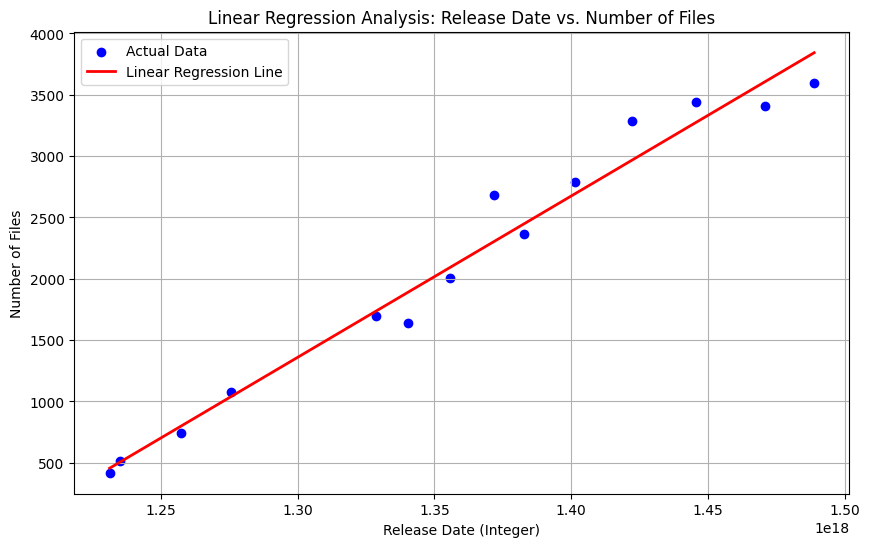

In [9]:
# WRITE YOUR CODE HERE
from sklearn.metrics import mean_squared_error, r2_score

dfbc = dfb.copy()

# 1. Prepare the data
dfbc['release_date_int'] = pd.to_datetime(dfbc['release_date']).astype(int)
X = dfbc[['release_date_int']]
y = dfbc['nFiles']

# 2. Apply linear regression analysis
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# 3. Calculate Mean Relative Error and adjusted R-squared metrics
mean_relative_error = np.mean(np.abs((y - y_pred) / y)) * 100

n = len(y)
p = 1  
r_squared = r2_score(y, y_pred)
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print("Mean Relative Error:", mean_relative_error)
print("Adjusted R-squared:", adjusted_r_squared)

# 4. Generate scatter plot with linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(dfbc['release_date_int'], y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.title('Linear Regression Analysis: Release Date vs. Number of Files')
plt.xlabel('Release Date (Integer)')
plt.ylabel('Number of Files')
plt.legend()
plt.grid(True)
plt.show()

### Questions:

5. Choose an option regarding the growth of the software. Motivate your choice using the 2D regression plot.  
    a) Linear  
    b) Sub-linear  
    c) Super-linear  

Linear

6. Report the MRE and ajusted R-squared values.

Mean Relative Error: 6.4910348203378865

Adjusted R-squared: 0.9698878845416344

### Fitting & forecasting

Using **Dataset A**, apply parametric regression models (e.g., linear, exponential, power, quadratic, logarithmic) to predict the number of files in software releases based on historical data.

**Steps:**

1. Prepare Data:
   - Convert "release_date" to datetime format.
   - Calculate "release_days" as the number of days since the earliest release.

2. Split Data:
   - Separate data into features (release days) and target variable (number of files).
   - Split data into training and testing sets from the earliest release up to a specific point.

3. Build and Train Models:
   - Define regression models.
   - Fit models to training data (maybe using `curve_fit` from SciPy).

4. Forecast Future Data:
   - Predict the number of files for future release days using trained models.

5. Visualize Results:
   - Plot original data and forecasted values for each regression model.

6. Evaluate Models:
   - Calculate adjusted R-squared and mean relative error for each model using training and test data.

In [10]:
# WRITE YOUR CODE HERE
dfac = dfa.copy()
dfac['release_date'] = pd.to_datetime(dfac['release_date'])
dfac['release_days'] = (dfac['release_date'] - dfac['release_date'].min()).dt.days

In [11]:
# WRITE YOUR CODE HERE
X = dfac['release_days'].values.reshape(-1, 1)
y = dfac['nFiles'].values

train_size = 0.8
split_index = int(train_size * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [12]:
# WRITE YOUR CODE HERE
def linear_func(x, a, b):
    return a * x + b

def exponential_func(x, a, b):
    return a * np.exp(b * x)

def power_func(x, a, b):
    return a * np.power(x, b)

def quadratic_func(x, a, b, c):
    return a * x**2 + b * x + c

def logarithmic_func(x, a, b):
    return a * np.log(x) + b
linear_params, _ = curve_fit(linear_func, X_train.flatten(), y_train)
exponential_params, _ = curve_fit(exponential_func, X_train.flatten(), y_train)
power_params, _ = curve_fit(power_func, X_train.flatten(), y_train)
quadratic_params, _ = curve_fit(quadratic_func, X_train.flatten(), y_train)
logarithmic_params, _ = curve_fit(logarithmic_func, X_train.flatten(), y_train)


/tmp/ipykernel_25330/2631120915.py:6: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)
/home/jika/IdeaProjects/Software-Evolution-Practical-Lehmans-Laws/.venv/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:980: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
/tmp/ipykernel_25330/2631120915.py:17: OptimizeWarning: Covariance of the parameters could not be estimated
  exponential_params, _ = curve_fit(exponential_func, X_train.flatten(), y_train)
/tmp/ipykernel_25330/2631120915.py:15: RuntimeWarning: divide by zero encountered in log
  return a * np.log(x) + b
/tmp/ipykernel_25330/2631120915.py:20: OptimizeWarning: Covariance of the parameters could not be estimated
  logarithmic_params, _ = curve_fit(logarithmic_func, X_train.flatten(), y_train)


In [13]:
# WRITE YOUR CODE HERE
X_future = np.arange(dfac['release_days'].max() + 1).reshape(-1, 1)

y_linear = linear_func(X_future.flatten(), *linear_params)
y_exponential = exponential_func(X_future.flatten(), *exponential_params)
y_power = power_func(X_future.flatten(), *power_params)
y_quadratic = quadratic_func(X_future.flatten(), *quadratic_params)
y_logarithmic = logarithmic_func(X_future.flatten(), *logarithmic_params)

/tmp/ipykernel_25330/2631120915.py:6: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)
/tmp/ipykernel_25330/2631120915.py:15: RuntimeWarning: divide by zero encountered in log
  return a * np.log(x) + b


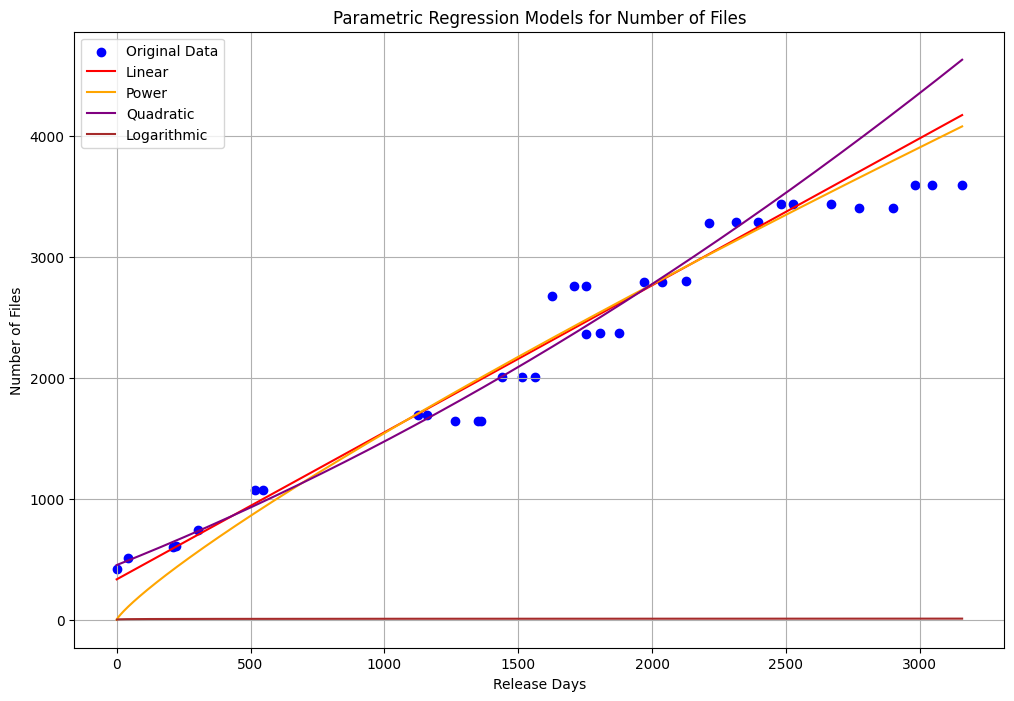

In [14]:
# WRITE YOUR CODE HERE
plt.figure(figsize=(12, 8))
plt.scatter(dfac['release_days'], dfac['nFiles'], label='Original Data', color='blue')
plt.plot(X_future, y_linear, label='Linear', color='red')
#plt.plot(X_future, y_exponential, label='Exponential', color='green')
plt.plot(X_future, y_power, label='Power', color='orange')
plt.plot(X_future, y_quadratic, label='Quadratic', color='purple')
plt.plot(X_future, y_logarithmic, label='Logarithmic', color='brown')

plt.title('Parametric Regression Models for Number of Files')
plt.xlabel('Release Days')
plt.ylabel('Number of Files')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# WRITE YOUR CODE HERE
# Function to calculate adjusted R-squared
def adjusted_r2_score(y_true, y_pred, n, p):
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
    return adj_r2

# Function to calculate mean relative error
def mean_relative_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

# Evaluate Models
models = {
    'Linear': linear_func,
    'Power': power_func,
    'Quadratic': quadratic_func,
    #'Logarithmic': logarithmic_func
}

for name, model in models.items():
    y_train_pred = model(X_train.flatten(), *locals()[name.lower() + '_params'])
    y_test_pred = model(X_test.flatten(), *locals()[name.lower() + '_params'])
    
    # Adjusted R-squared
    n_train, p_train = X_train.shape[0], X_train.shape[1] + 1
    adj_r2_train = adjusted_r2_score(y_train, y_train_pred, n_train, p_train)
    
    n_test, p_test = X_test.shape[0], X_test.shape[1] + 1
    adj_r2_test = adjusted_r2_score(y_test, y_test_pred, n_test, p_test)
    
    print(f"Model: {name}")
    print(f"Adjusted R-squared (Train): {adj_r2_train}")
    print(f"Adjusted R-squared (Test): {adj_r2_test}")
    
    # Mean Relative Error
    mre_train = mean_relative_error(y_train, y_train_pred)
    mre_test = mean_relative_error(y_test, y_test_pred)
    
    print(f"Mean Relative Error (Train): {mre_train}")
    print(f"Mean Relative Error (Test): {mre_test}\n")


Model: Linear
Adjusted R-squared (Train): 0.9555197915659198
Adjusted R-squared (Test): -26.04959910584443
Mean Relative Error (Train): 0.08364831717824832
Mean Relative Error (Test): 0.09340687667504398

Model: Power
Adjusted R-squared (Train): 0.9330447933127184
Adjusted R-squared (Test): -17.73085067881416
Mean Relative Error (Train): 0.16618917184591292
Mean Relative Error (Test): 0.07829659735622763

Model: Quadratic
Adjusted R-squared (Train): 0.9618439424828347
Adjusted R-squared (Test): -92.87077377117427
Mean Relative Error (Train): 0.06788052137945627
Mean Relative Error (Test): 0.1801414840437577



### Questions:

7. Which regression model do you prefer for assessing the goodness of fit, based on the evaluation metrics scores? Why?

Linear model because it has the highest adjusted R-squared score, all the model have a low adjested R-square so it looks like there is a problem of overfitting. Linear have the lower MRE.

8. Which regression model do you prefer for assessing forecast accuracy, based on the evaluation metrics scores? Why?

The Power model has the lowest MRE on the test data, so it have a better accuracy in predictions compared to the other models. The Power model would be preferred

### Modify the CLOC parameters

Exclude all bank lines and verify if the Law of Increasing Growth applies after this filtering

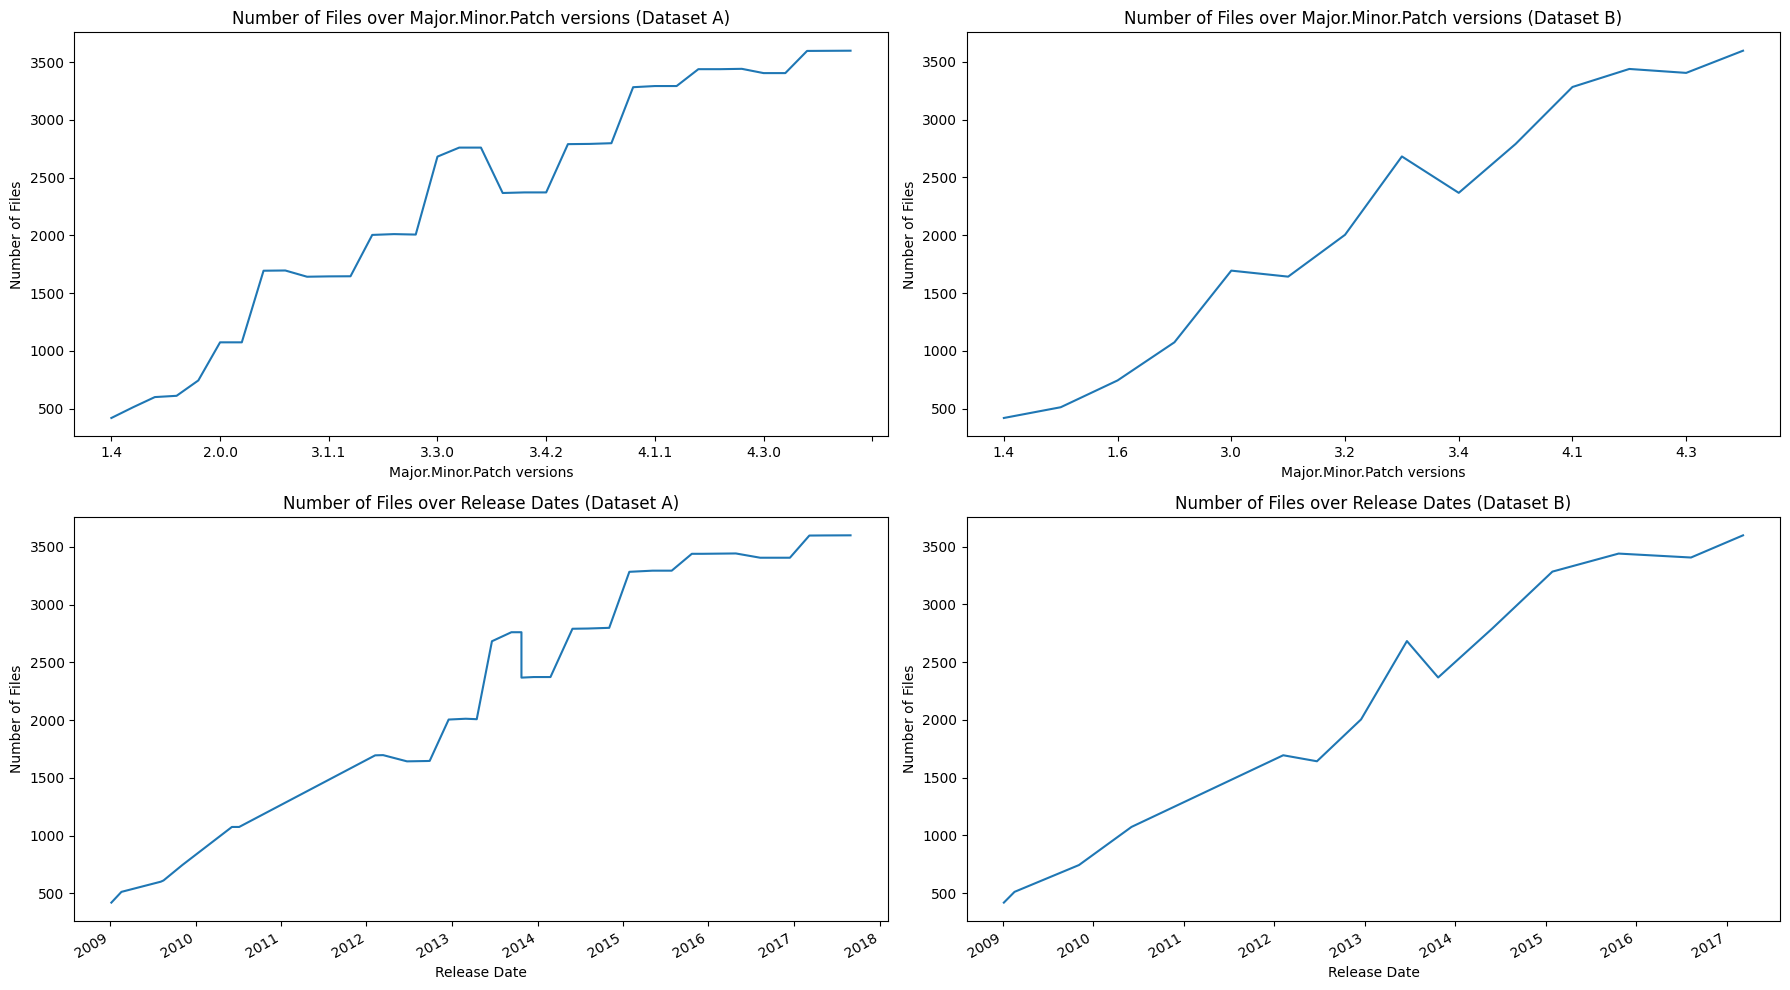

In [20]:
# WRITE YOUR CODE HERE
import matplotlib.pyplot as plt

df_datasetA_filtered = dfa[~dfa['tag'].str.contains('bank', case=False)]

df_datasetB_filtered = dfb[~dfb['tag'].str.contains('bank', case=False)]

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

df_datasetA_filtered.plot(x='tag', y='nFiles', ax=axes[0, 0], legend=False)
axes[0, 0].set_title('Number of Files over Major.Minor.Patch versions (Dataset A)')
axes[0, 0].set_xlabel('Major.Minor.Patch versions')
axes[0, 0].set_ylabel('Number of Files')

df_datasetB_filtered.plot(x='tag', y='nFiles', ax=axes[0, 1], legend=False)
axes[0, 1].set_title('Number of Files over Major.Minor.Patch versions (Dataset B)')
axes[0, 1].set_xlabel('Major.Minor.Patch versions')
axes[0, 1].set_ylabel('Number of Files')

df_datasetA_filtered.plot(x='release_date', y='nFiles', ax=axes[1, 0], legend=False)
axes[1, 0].set_title('Number of Files over Release Dates (Dataset A)')
axes[1, 0].set_xlabel('Release Date')
axes[1, 0].set_ylabel('Number of Files')

df_datasetB_filtered.plot(x='release_date', y='nFiles', ax=axes[1, 1], legend=False)
axes[1, 1].set_title('Number of Files over Release Dates (Dataset B)')
axes[1, 1].set_xlabel('Release Date')
axes[1, 1].set_ylabel('Number of Files')

plt.tight_layout()
plt.show()


Exclude all comment lines and verify if the Law of Increasing Growth applies after this filtering

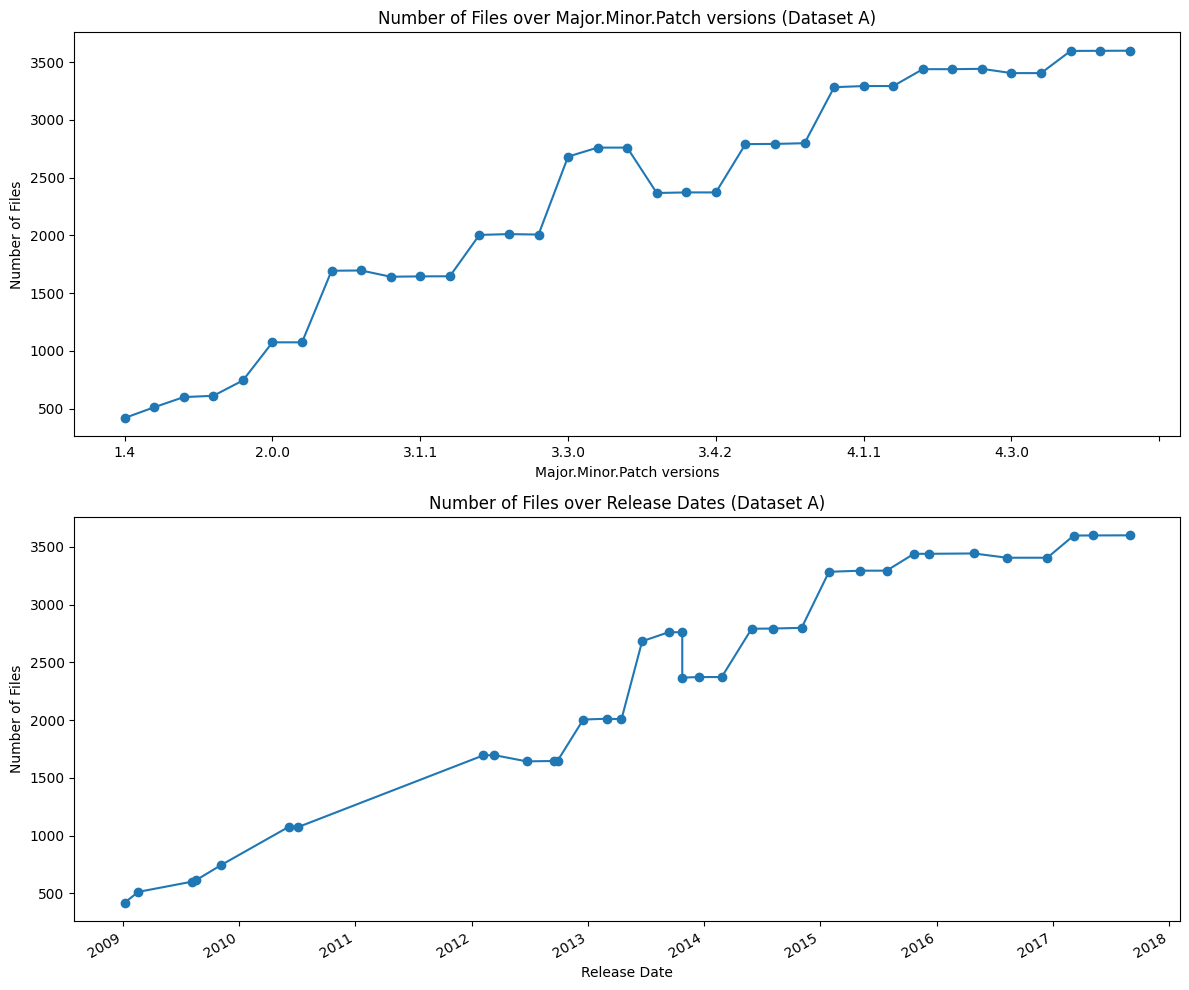

In [22]:
# WRITE YOUR CODE HERE
df_datasetA_filtered = dfa[dfa['comment'] != '0']

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

df_datasetA_filtered.plot(x='tag', y='nFiles', ax=axes[0], legend=False, marker='o', linestyle='-')
axes[0].set_title('Number of Files over Major.Minor.Patch versions (Dataset A)')
axes[0].set_xlabel('Major.Minor.Patch versions')
axes[0].set_ylabel('Number of Files')

df_datasetA_filtered.plot(x='release_date', y='nFiles', ax=axes[1], legend=False, marker='o', linestyle='-')
axes[1].set_title('Number of Files over Release Dates (Dataset A)')
axes[1].set_xlabel('Release Date')
axes[1].set_ylabel('Number of Files')

plt.tight_layout()
plt.show()

## 3. Law of Continuing Change

### Dataset A : Major.Minor.Patch tag format

Import Dataset A that contains number of lines of code that are added, modified, removed and same between two consecutive tags for the three component versions (major.minor.patch)

In [23]:
# WRITE YOUR CODE HERE
df_a = pd.read_csv('data/LawContinuingChangeDatasetA.csv')
df_a

,first_tag,second_tag,added,same,modified,removed,date
0,1.4,1.5.0,2681,43708,2162,17370,2009-02-18
1,1.5.0,1.5.1,34218,25802,3220,38813,2009-08-05
2,1.5.1,1.5.2,18832,46583,2420,19665,2009-08-17
3,1.5.2,1.6.1,10056,50312,8300,28187,2009-11-05
4,1.6.1,2.0.0,24236,55784,6779,53023,2010-06-05
5,2.0.0,2.0.1,4,115527,55,117,2010-07-06
6,2.0.1,3.0.0,49353,56547,9799,121900,2012-02-07
7,3.0.0,3.0.1,34,188138,74,810,2012-03-12
8,3.0.1,3.1.0,9059,176395,3568,11306,2012-06-22
9,3.1.0,3.1.1,77,191025,167,834,2012-09-17


Create a plot displaying all features together. Show the outcomes with dates on the x-axis and the corresponding numbers on the y-axis.

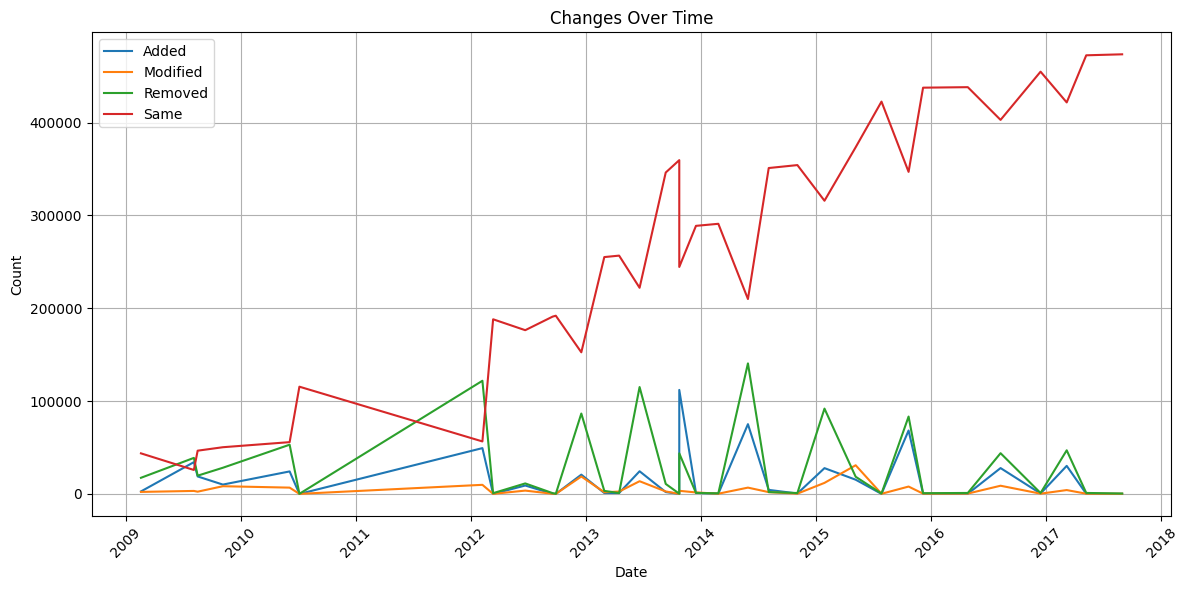

In [24]:
# WRITE YOUR CODE HERE
# WRITE YOUR CODE HERE

df_a['date'] = pd.to_datetime(df_a['date'])

plt.figure(figsize=(12, 6))
plt.plot(df_a['date'], df_a['added'], label='Added')
plt.plot(df_a['date'], df_a['modified'], label='Modified')
plt.plot(df_a['date'], df_a['removed'], label='Removed')
plt.plot(df_a['date'], df_a['same'], label='Same')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Changes Over Time')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


### Dataset B : Major.Minor tag format

Import Dataset B that contains number of lines of code that are added, modified, removed and same between two consecutive tags for the minor versions (major.minor)

In [25]:
# WRITE YOUR CODE HERE
df_b = pd.read_csv('data/LawContinuingChangeDatasetB.csv')
df_b

,first_tag,second_tag,added,same,modified,removed,date
0,1.4,1.5.0,2681,43708,2162,17370,2009-02-18
1,1.5.0,1.6.1,38753,21466,3021,62312,2009-11-05
2,1.6.1,2.0.0,24236,55784,6779,53023,2010-06-05
3,2.0.0,3.0.0,49339,56466,9781,121999,2012-02-07
4,3.0.0,3.1.0,9091,175549,3606,12114,2012-06-22
5,3.1.0,3.2.0,20765,151608,18896,87430,2012-12-17
6,3.2.0,3.3.0,25240,216618,16076,118220,2013-06-20
7,3.3.0,3.4.0,104598,242521,3795,45239,2013-10-24
8,3.4.0,4.0.0,75798,208717,7040,141618,2014-05-30
9,4.0.0,4.1.0,27544,318189,11642,89832,2015-01-28


Produce a plot where all features are represented together. Present the outcomes with dates on the x-axis and the corresponding numbers on the y-axis.

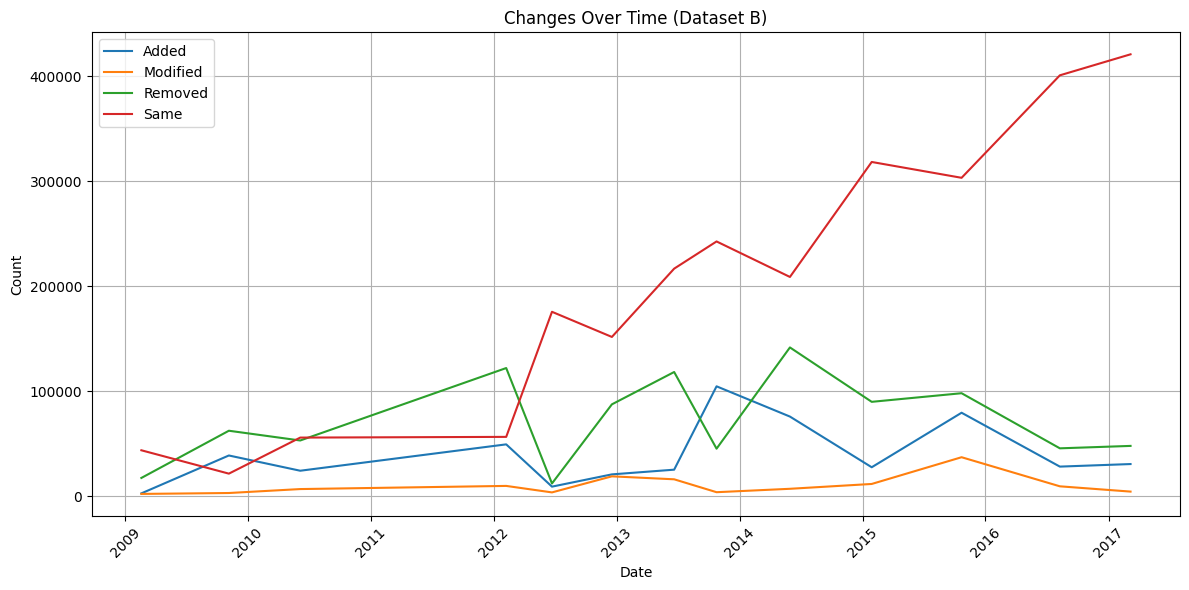

In [26]:
# WRITE YOUR CODE HERE

df_b['date'] = pd.to_datetime(df_b['date'])

plt.figure(figsize=(12, 6))
plt.plot(df_b['date'], df_b['added'], label='Added')
plt.plot(df_b['date'], df_b['modified'], label='Modified')
plt.plot(df_b['date'], df_b['removed'], label='Removed')
plt.plot(df_b['date'], df_b['same'], label='Same')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Changes Over Time (Dataset B)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Question:

1. Do you find empirical support for the Law of Continuing Change ? Motivate your response.

The dataset demonstrates a pattern of ongoing modifications, additions, and deletions, providing a validation for the Law of Continuing Change